In [37]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

In [38]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [39]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [41]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [42]:
import matplotlib.pyplot as plt 
%matplotlib inline 

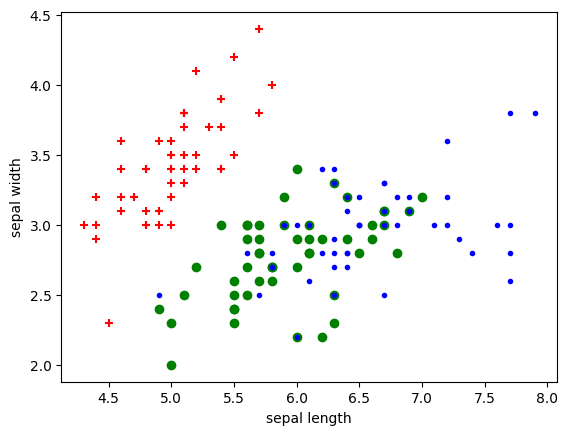

In [43]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="red",marker="+") 
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="green",marker="o") 
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color="blue",marker=".") 

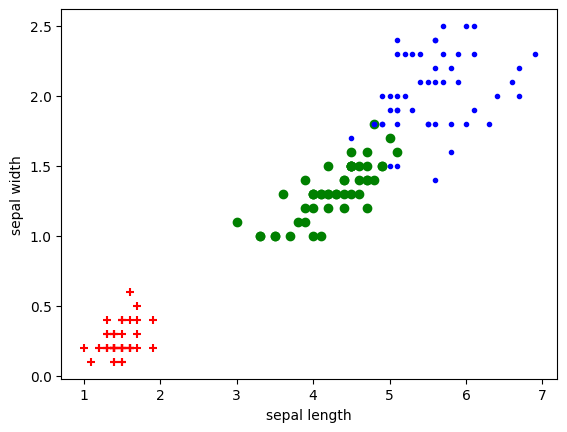

In [44]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="red",marker="+") 
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color="green",marker="o") 
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color="blue",marker=".") 

In [45]:
x = df.drop(["target","flower_name"],axis=1)
y = df.target

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
KNN = KNeighborsClassifier(n_neighbors=3)

In [50]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
KNN.score(x_test,y_test)

1.0

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
y_pred =KNN.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [54]:
import seaborn as sn

<Axes: >

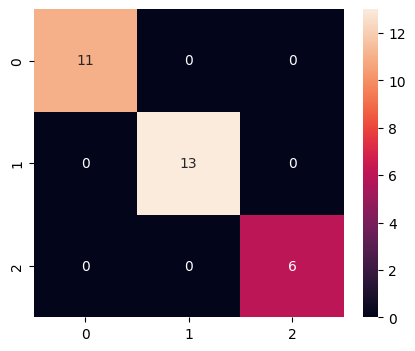

In [61]:
plt.figure(figsize=(5,4))
sn.heatmap(cm,annot=True)